In [14]:
import numpy as np
import matplotlib.pyplot as plt
import MARIGOLD as mg
import os
import openpyxl as op

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
author = 'ryan'
refetch = True
xl_compare = False
multiplot = True

z_step = 0.01

iate_method = None
cd_method = 'err_iter'
void_method = 'driftflux'
C_inf = 1
debug = False

In [16]:
if author == 'ryan':
    endpoints = [110]
    modes = [None]

elif author == 'quan':
    # endpoints       = [114.63, 14.137+14.137+9.25+114.63, 125.63+114.63+14.137+14.137+9.25]
    # modes           = [None, 'ubend', None]

    # endpoints       = [110, 130, 146, 226]
    # modes           = [None, 'elbow', 'elbow', None]

    # endpoints       = [110, 146, 226]
    # modes           = [None, 'ubend', None]

    endpoints = [226]
    modes = ['vd']

elif author == 'bettis':
    endpoints = [155.51]
    modes = [None]


In [17]:
if author == 'ryan':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\25.4mm_ryan")
    # print(cwd)
    dat_to_fetch = 'database_r.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='ryan_template')

elif author == 'quan':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\25.4mm_quan_2")
    # print(cwd)
    dat_to_fetch = 'database_q.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='adix_template')

elif author == 'yadav':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\50.8mm")
    # print(cwd)
    dat_to_fetch = 'database_y.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='yadav_template')

elif author == 'bettis':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\Data_Summary_OneGroup")
    print(cwd)
    dat_to_fetch = 'database_b.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='bettis_template', debug=True)

else:
    database = mg.loadProbeData('./database.dat')
    print(database)

database = mg.loadProbeData(dat_to_fetch)

Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet type identified as ryan_template, referencing cell U23 for jgloc
Sheet 

In [18]:
# Unique flow condition finding, for plotting
cmap = []
lmap = []
for i, cond in enumerate(database):
    cmap.append([cond.theta, cond.jf, cond.jgref])
    lmap.append(cond.LoverD)
cmap = np.array(cmap)
umap = np.unique(cmap,axis=0)
sp = np.min(lmap)

if author == 'quan' and modes == ['vd']:
    sp = 146

H90: 0.111
I90: 0.185

Results match really well with Drew's MATLAB suite, using opt = 3 and continuity
Void fraction matches with Drew's opt = 2, but TI seems low for run I90 and high for run H90 -- must be something with the Weber number criterion

jf=1.56_jgloc=0.10_theta=90.0_port=P1_ryan


C:\Users\kang284\AppData\Local\Temp\ipykernel_11248\1987199172.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_idx = int(np.where((umap == cmap[i]).all(axis=1))[0])


jf=1.56_jgloc=0.10_theta=90.0_port=P2_ryan
jf=1.56_jgloc=0.11_theta=90.0_port=P3_ryan
jf=2.5_jgloc=0.10_theta=90.0_port=P1_ryan
jf=2.5_jgloc=0.10_theta=90.0_port=P2_ryan
jf=2.5_jgloc=0.11_theta=90.0_port=P3_ryan
jf=4.0_jgloc=0.10_theta=90.0_port=P1_ryan
jf=4.0_jgloc=0.10_theta=90.0_port=P2_ryan
jf=4.0_jgloc=0.11_theta=90.0_port=P3_ryan
jf=4.0_jgloc=0.16_theta=90.0_port=P1_ryan
jf=4.0_jgloc=0.17_theta=90.0_port=P2_ryan
jf=4.0_jgloc=0.19_theta=90.0_port=P3_ryan
jf=4.0_jgloc=0.29_theta=90.0_port=P1_ryan
jf=4.0_jgloc=0.31_theta=90.0_port=P2_ryan
jf=4.0_jgloc=0.33_theta=90.0_port=P3_ryan


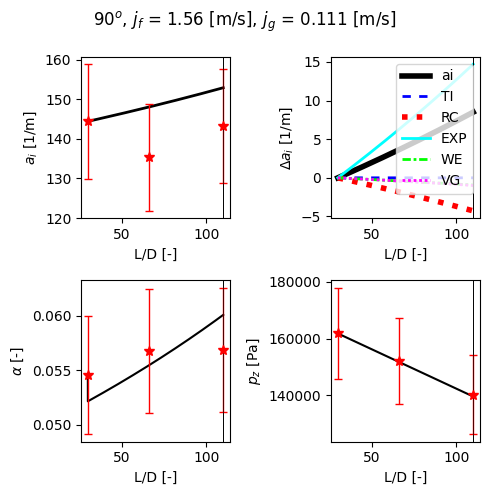

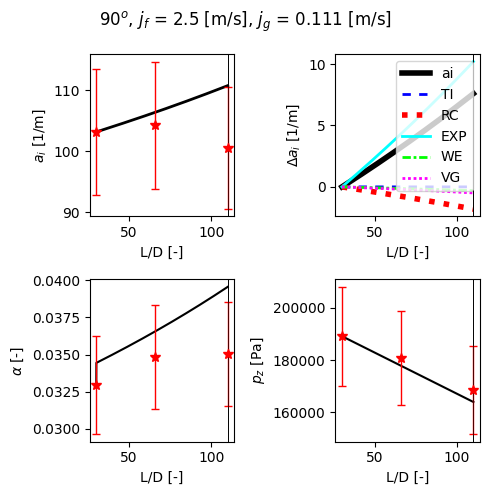

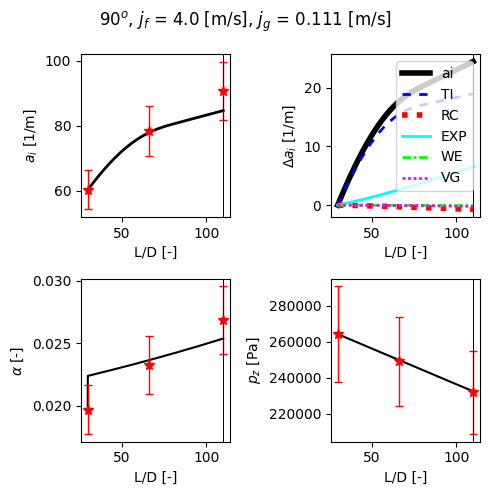

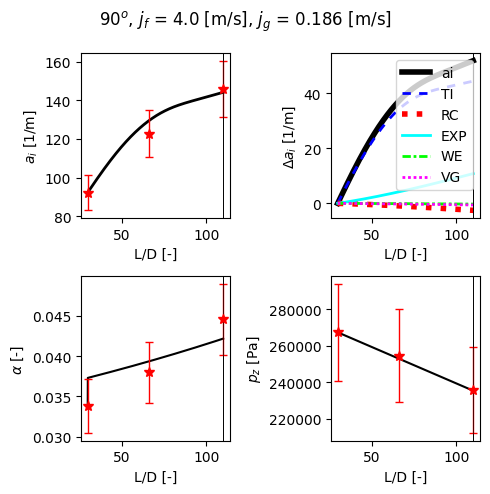

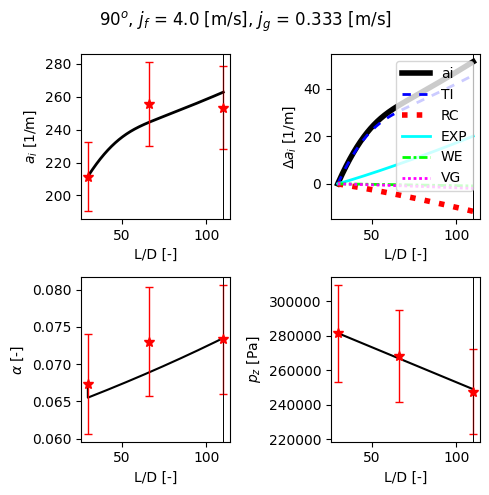

In [19]:
for i, cond in enumerate(database):
    cond:mg.Condition

    print(cond)

    if True:
        if author != 'bettis':
            if cond.theta == 90 and cond.LoverD < 130:
                cond.mirror(axisym = True)
            else:
                cond.mirror(sym90=True)

        p_idx = int(np.where((umap == cmap[i]).all(axis=1))[0])

        plt.figure(p_idx,figsize=(5,5))
        plt.suptitle("${}^o$, $j_f$ = {} [m/s], $j_g$ = {} [m/s]".format(int(cond.theta),cond.jf,cond.jgref))
        
        ai_st = 0
        if cond.LoverD == sp:
            for ii, cp in enumerate(endpoints):

                if author == 'bettis':
                    cheat = True
                else:
                    if cp > 130:
                        cond.theta = -abs(cond.theta)

                    cheat = False

                if modes[ii] == None:
                    dpdz_method     = 'LM'
                    if author == 'quan':
                        LM_C        = 34
                    else:
                        LM_C        = 25
                    k_m             = None

                elif modes[ii] == 'elbow':
                    dpdz_method     = 'Kim'
                    LM_C            = 40
                    k_m             = 0.1

                elif modes[ii] == 'ubend':
                    dpdz_method     = 'Kim'
                    LM_C            = 85
                    k_m             = 0.2

                elif modes[ii] == 'vd':
                    dpdz_method     = 'LM'
                    LM_C            = 68
                    k_m             = None

                if ii == 0:
                    if author == 'bettis':
                        io = mg.iate_1d_1g(
                            cond, query = cp, z_step = z_step,
                            C_WE = 0.042, C_RC = 0.003, C_TI = 0.026, We_cr = 8, C = 3, alpha_max = 0.75,
                            C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                            )
                    else:
                        io = mg.iate_1d_1g(
                            cond, query = cp, z_step = z_step,
                            C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                            )
                    
                    label_ai = 'ai'
                    label_ti = 'TI'
                    label_rc = 'RC'
                    label_exp = 'EXP'
                    label_we = 'WE'
                    label_vg = 'VG'
                else:
                    if author == 'bettis':
                        io = mg.iate_1d_1g(
                            cond, query = cp, z_step = z_step, io = io,
                            C_WE = 0.042, C_RC = 0.003, C_TI = 0.026, We_cr = 8, C = 3, alpha_max = 0.75,
                            C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                            )
                    else:
                        io = mg.iate_1d_1g(
                            cond, query = cp, z_step = z_step, io = io,
                            C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                            )
                    
                    label_ai = None
                    label_ti = None
                    label_rc = None
                    label_exp = None
                    label_we = None
                    label_vg = None
                
                z_mesh  = io["z_mesh"]
                ai      = io["ai"]
                aiti    = io["aiti"]
                airc    = io["airc"]
                aiexp   = io["aiexp"]
                aiwe    = io["aiwe"]
                aivg    = io["aivg"]
                alpha   = io["alpha"]
                pz      = io["pz"]

                z_mesh = z_mesh / cond.Dh

                if multiplot:
                    plt.figure(p_idx)
                    plt.subplot(221)
                    plt.plot(z_mesh,ai,'k',linewidth=2)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(222)
                    plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    # plt.ylim(bottom = -10, top = 60)

                    plt.figure(p_idx)
                    plt.subplot(223)
                    plt.plot(z_mesh,alpha,'k')
                    plt.ylabel(r'$\alpha$ [-]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(224)
                    plt.plot(z_mesh,pz,'k')
                    plt.ylabel('$p_{z}$ [Pa]')
                    plt.xlabel('L/D [-]')
                    
                else:
                    plt.figure(p_idx)
                    plt.plot(z_mesh,ai,'k',linewidth=4)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    # plt.figure(p_idx)
                    # plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    # plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    # plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    # plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    # plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    # plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    # plt.legend(loc='upper right')
                    # plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    # plt.xlabel('L/D [-]')
                    # plt.xlim(left = 20, right = 120)
                    # plt.ylim(bottom = -10, top = 60)

                ai_st = ai_st + ai[-1] - ai[0]

        perr = 0.1

        if multiplot:
            if author != 'bettis':
                plt.figure(p_idx)
                plt.subplot(221)
                plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(p_idx)
                    plt.subplot(221)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

                plt.figure(p_idx)
                plt.subplot(222)

                plt.figure(p_idx)
                plt.subplot(223)
                plt.errorbar(cond.LoverD,cond.area_avg('alpha'),cond.area_avg('alpha')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

                if xl_compare == True and cond.area_avg_void_sheet != '#REF!':
                    plt.figure(p_idx)
                    plt.subplot(223)
                    plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3)

                p = (cond.jgatm * 101325 / cond.jgloc)

                plt.figure(p_idx)
                plt.subplot(224)
                plt.errorbar(cond.LoverD,p,p*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

                for iii, cp in enumerate(endpoints):
                    plt.figure(p_idx)

                    plt.subplot(221)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                    plt.subplot(222)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                    plt.subplot(223)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                    plt.subplot(224)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()
            else:
                if cond.area_avg_ai_sheet != None and cond.area_avg_void_sheet != None:
                    plt.figure(p_idx)
                    plt.subplot(221)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                    plt.figure(p_idx)
                    plt.subplot(222)

                    plt.figure(p_idx)
                    plt.subplot(223)
                    plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

                    p = cond.pz

                    plt.figure(p_idx)
                    plt.subplot(224)
                    plt.errorbar(cond.LoverD,p,p*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

                    plt.tight_layout()
        
        else:
            if author != 'bettis':
                plt.figure(p_idx)
                plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(p_idx)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

                for iii, cp in enumerate(endpoints):
                    plt.figure(p_idx)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()
            else:
                if cond.area_avg_ai_sheet != None:
                    plt.figure(p_idx)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                    plt.tight_layout()

        if author == 'bettis':
            wb = op.load_workbook(filename="H:\TRSL-H\IATE\Button_Book\Kim_Research_BubbleDoc (DONE)\Bettis\OneGroupEvaluation\AllConditions\standard_thesis.xlsx", data_only=True)

            ws = wb['z']

            kim_z = []
            for row in ws.iter_rows(min_row=1,max_row=1,values_only=True):
                for value in row:
                    kim_z.append(value)

            # kim_z = ws['A1':'AU1'].value

            ws = wb['ai']
            kim_ai_run1 = []
            kim_ai_run2 = []
            kim_ai_run3 = []
            kim_ai_run4 = []
            kim_ai_run5 = []
            kim_ai_run6 = []
            kim_ai_run7 = []
            kim_ai_run8 = []
            kim_ai_run9 = []

            for row in ws.iter_rows(min_row=1,max_row=1,values_only=True):
                for value in row:
                    kim_ai_run1.append(value)
            for row in ws.iter_rows(min_row=2,max_row=2,values_only=True):
                for value in row:
                    kim_ai_run2.append(value)
            for row in ws.iter_rows(min_row=3,max_row=3,values_only=True):
                for value in row:
                    kim_ai_run3.append(value)
            for row in ws.iter_rows(min_row=4,max_row=4,values_only=True):
                for value in row:
                    kim_ai_run4.append(value)
            for row in ws.iter_rows(min_row=5,max_row=5,values_only=True):
                for value in row:
                    kim_ai_run5.append(value)
            for row in ws.iter_rows(min_row=8,max_row=8,values_only=True):
                for value in row:
                    kim_ai_run6.append(value)
            for row in ws.iter_rows(min_row=9,max_row=9,values_only=True):
                for value in row:
                    kim_ai_run7.append(value)
            for row in ws.iter_rows(min_row=10,max_row=10,values_only=True):
                for value in row:
                    kim_ai_run8.append(value)
            for row in ws.iter_rows(min_row=11,max_row=11,values_only=True):
                for value in row:
                    kim_ai_run9.append(value)

            # kim_ai_run1 = ws['A1':'AU1'].value
            # kim_ai_run2 = ws['A2':'AU2'].value
            # kim_ai_run3 = ws['A3':'AU3'].value
            # kim_ai_run4 = ws['A4':'AU4'].value
            # kim_ai_run5 = ws['A5':'AU5'].value
            # kim_ai_run6 = ws['A8':'AU8'].value
            # kim_ai_run7 = ws['A9':'AU9'].value
            # kim_ai_run8 = ws['A10':'AU10'].value
            # kim_ai_run9 = ws['A11':'AU11'].value

            plt.figure(p_idx)

            ls = '-' #'dotted'#(0,(3,5))
            lw = 1
            lc = 'lime'

            if multiplot:
                plt.subplot(221)

            if cond.jf == 0.32 and cond.jgref == 0.047:
                plt.plot(kim_z,kim_ai_run1,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 0.95 and cond.jgref == 0.047:
                plt.plot(kim_z,kim_ai_run2,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 1.89 and cond.jgref == 0.095:
                plt.plot(kim_z,kim_ai_run3,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 0.95 and cond.jgref == 0.187:
                plt.plot(kim_z,kim_ai_run4,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 1.89 and cond.jgref == 0.193:
                plt.plot(kim_z,kim_ai_run5,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 200)
            elif cond.jf == 0.63 and cond.jgref == 0.279:
                plt.plot(kim_z,kim_ai_run6,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 600)
            elif cond.jf == 2.84 and cond.jgref == 0.287:
                plt.plot(kim_z,kim_ai_run7,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 300)
            elif cond.jf == 1.89 and cond.jgref == 0.385:
                plt.plot(kim_z,kim_ai_run8,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 400)
            elif cond.jf == 4.4 and cond.jgref == 0.94:
                plt.plot(kim_z,kim_ai_run9,lc,linestyle=ls,linewidth=lw)

                if not multiplot:
                    plt.xlim(left = 31.5789, right = 157.8947)
                    plt.ylim(bottom = 0, top = 400)
            



In [20]:
debug = False

if debug:
    for cond in database:
        cond:mg.Condition

        print(cond)
        with open(f"{cond}.txt", "w") as f:
            cond.pretty_print(print_to_file=True, FID=f)

            cond.plot_contour('alpha',save_dir='./MGDebug/alpha/',show=False,plot_measured_points=True)
            cond.plot_contour('ai',save_dir='./MGDebug/ai/',show=False,plot_measured_points=True)

In [21]:
Db = 6*alpha/ai

print(Db)

[0.00191052 0.00185889 0.00185848 ... 0.00167887 0.00167887 0.00167887]
